# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data.  Such as the cameral of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different calsses of food): https://www.kaggle.com/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak) using the image data modification notebook

**Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-22 00:33:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.127.128, 2a00:1450:4013:c16::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.4MB/s    in 3.1s    

2023-02-22 00:33:34 (33.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usaually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way o find our how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['1032846.jpg']
Image shape: (307, 512, 3)


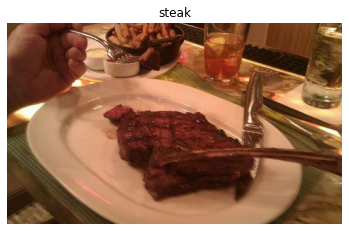

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# The iimages we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(307, 512, 3), dtype=uint8, numpy=
array([[[ 88,  54,  27],
        [ 91,  57,  30],
        [ 96,  62,  34],
        ...,
        [107,  66,  20],
        [118,  78,  27],
        [131,  91,  39]],

       [[ 93,  59,  32],
        [ 94,  60,  32],
        [ 94,  60,  32],
        ...,
        [109,  71,  24],
        [125,  88,  36],
        [131,  94,  41]],

       [[ 95,  61,  33],
        [ 95,  61,  33],
        [ 94,  60,  32],
        ...,
        [121,  88,  37],
        [135, 102,  49],
        [137, 104,  51]],

       ...,

       [[123,  89,  61],
        [134, 100,  72],
        [145, 112,  81],
        ...,
        [120,  83,  41],
        [115,  80,  38],
        [119,  86,  43]],

       [[106,  72,  44],
        [119,  85,  57],
        [133, 100,  69],
        ...,
        [121,  84,  42],
        [114,  79,  37],
        [118,  85,  42]],

       [[ 92,  58,  30],
        [105,  71,  43],
        [122,  89,  58],
        ...,
        [122,  85,  4

In [11]:
# View the image shape
img.shape # returns width, height, color channels

(307, 512, 3)

In [12]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.34509804, 0.21176471, 0.10588235],
        [0.35686275, 0.22352941, 0.11764706],
        [0.37647059, 0.24313725, 0.13333333],
        ...,
        [0.41960784, 0.25882353, 0.07843137],
        [0.4627451 , 0.30588235, 0.10588235],
        [0.51372549, 0.35686275, 0.15294118]],

       [[0.36470588, 0.23137255, 0.1254902 ],
        [0.36862745, 0.23529412, 0.1254902 ],
        [0.36862745, 0.23529412, 0.1254902 ],
        ...,
        [0.42745098, 0.27843137, 0.09411765],
        [0.49019608, 0.34509804, 0.14117647],
        [0.51372549, 0.36862745, 0.16078431]],

       [[0.37254902, 0.23921569, 0.12941176],
        [0.37254902, 0.23921569, 0.12941176],
        [0.36862745, 0.23529412, 0.1254902 ],
        ...,
        [0.4745098 , 0.34509804, 0.14509804],
        [0.52941176, 0.4       , 0.19215686],
        [0.5372549 , 0.40784314, 0.2       ]],

       ...,

       [[0.48235294, 0.34901961, 0.23921569],
        [0.5254902 , 0.39215686, 0.28235294],
        [0.56862745, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# Setup paths to our data directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 252ms/step - loss: 0.7119 - accuracy: 0.6100 - val_loss: 0.5896 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 12s 262ms/step - loss: 0.5417 - accuracy: 0.7547 - val_loss: 0.4276 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4524 - accuracy: 0.8020 - val_loss: 0.3700 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4176 - accuracy: 0.8260 - val_loss: 0.3544 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3519 - accuracy: 0.8480 - val_loss: 0.3343 - val_accuracy: 0.8720


In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 255ms/step - loss: 0.8607 - accuracy: 0.5133 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6939 - accuracy: 0.4887 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6930 - accuracy: 0.4893 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6953 - accuracy: 0.4947 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6889 - val_accuracy: 0.5020


In [16]:
# Get the summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but lets add a few steps)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 189ms/step - loss: 3.3275 - accuracy: 0.5887 - val_loss: 1.2004 - val_accuracy: 0.6680
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 1.0328 - accuracy: 0.6920 - val_loss: 1.3629 - val_accuracy: 0.5400
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.7461 - accuracy: 0.7240 - val_loss: 0.5735 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5174 - accuracy: 0.7753 - val_loss: 0.8715 - val_accuracy: 0.6320
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.8558 - accuracy: 0.7020 - val_loss: 0.7856 - val_accuracy: 0.6740


In [18]:
# Get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

While we did see an improvement in accuracy of model 3, the number of params needed to train is 485 times more than using the CNN model in model 1

## Binary Classification

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

['669960.jpg']
Image shape: (512, 512, 3)
['985164.jpg']
Image shape: (307, 512, 3)


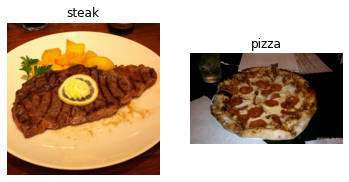

In [20]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data (prepare it for a model)

In [21]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rathar than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images ( or more) might not fir into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Default value for many deep learning projects

In [22]:
# Create train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                            target_size=(224, 224), # Target size of images (height, width)
                                            class_mode="binary", # type of data you're working with
                                            batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next batch of images/labels in train_data"
len(images), len(labels)

(32, 32)

In [25]:
# How many batches are there?
len(train_data)

47

In [26]:
1500/32

46.875

In [27]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [28]:
# View the first batch f labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start witha  baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create.  So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of slideing windows going across an input (higher = more complet model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across n input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [31]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [33]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 242ms/step - loss: 2.3186 - accuracy: 0.5067 - val_loss: 0.6611 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.5835 - accuracy: 0.6753 - val_loss: 0.5559 - val_accuracy: 0.6700
Epoch 3/5
47/47 [==============================] - 12s 262ms/step - loss: 0.4256 - accuracy: 0.8180 - val_loss: 0.4710 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 13s 269ms/step - loss: 0.2771 - accuracy: 0.9067 - val_loss: 0.4471 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 10s 202ms/step - loss: 0.1279 - accuracy: 0.9713 - val_loss: 0.4656 - val_accuracy: 0.7980


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

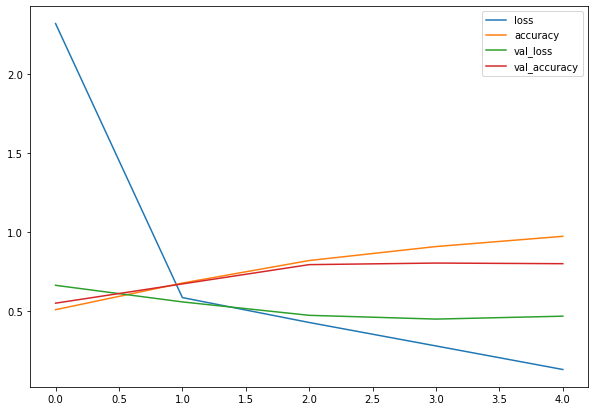

In [35]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [36]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation curves
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is overfitting the training dataset.  This means, it's learning the patterns in the training dataset, *to well* and thus the model's ability to eneralize to unseen data will be diminished.

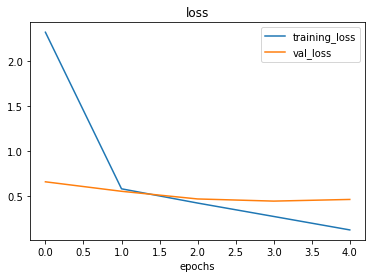

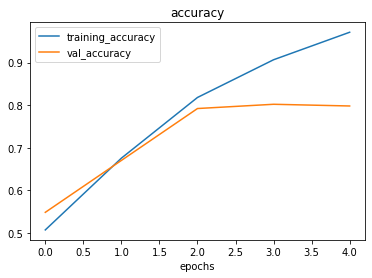

In [37]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

*Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also know as *regularization*

In [38]:
# Create the model (this is going to be our enw baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [39]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 202ms/step - loss: 0.6093 - accuracy: 0.6620 - val_loss: 0.5669 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4628 - accuracy: 0.7833 - val_loss: 0.3688 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4146 - accuracy: 0.8160 - val_loss: 0.3795 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4198 - accuracy: 0.8200 - val_loss: 0.3386 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3767 - accuracy: 0.8433 - val_loss: 0.3338 - val_accuracy: 0.8680


In [41]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [42]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


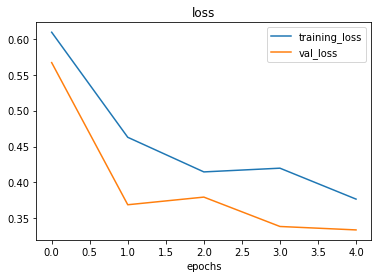

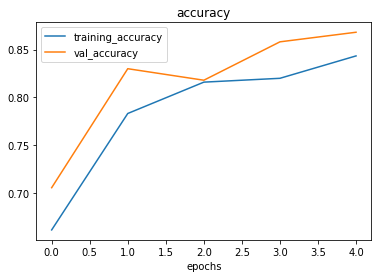

In [43]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [44]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # How much you want to rotate an image?
                                             shear_range=0.2, # how much you want to shear an image
                                             zoom_range=0.2, # how much you want to zoom in an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?

Data augmentation is the process of altering training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hpefully) patterns.  Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [45]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-sugmented train data batches
print("non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)


Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually on performed on the training data.  Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visulaize some augmented data

In [46]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented... only data (images)

showing image number: 4


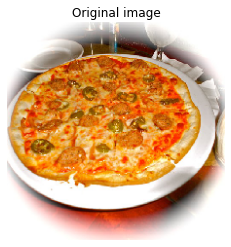

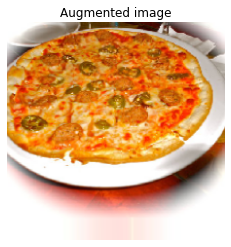

In [47]:
# Show the original image and augmented image
random_number = random.randint(0, 31) # our batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now've seen what augmented training dat looks like, let's build a model and see how it learns on the data

In [48]:
# Create the model (this is going to be our enw baseline)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 30s 576ms/step - loss: 0.7002 - accuracy: 0.4853 - val_loss: 0.6884 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 25s 522ms/step - loss: 0.6908 - accuracy: 0.5660 - val_loss: 0.6755 - val_accuracy: 0.5340
Epoch 3/5
47/47 [==============================] - 26s 554ms/step - loss: 0.6947 - accuracy: 0.5713 - val_loss: 0.6628 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6708 - accuracy: 0.6107 - val_loss: 0.5542 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 25s 540ms/step - loss: 0.7075 - accuracy: 0.6067 - val_loss: 0.7492 - val_accuracy: 0.5180


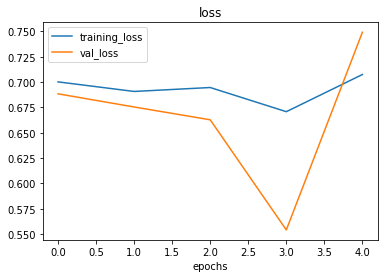

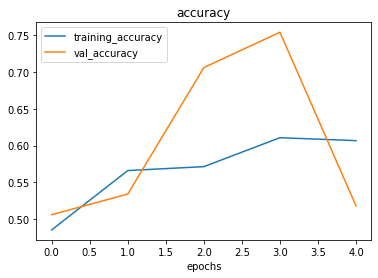

In [49]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [50]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [51]:
from keras.backend_config import set_epsilon
 # Create the model (same as before)
model_7 = Sequential([
     Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
     MaxPool2D(),
     Conv2D(10, 3, activation="relu"),
     MaxPool2D(),
     Conv2D(10, 3, activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1, activation="sigmoid")
 ])

 # Compile the model
model_7.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])
 
 # Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented_shuffled),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 539ms/step - loss: 0.6536 - accuracy: 0.5900 - val_loss: 0.4991 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 27s 573ms/step - loss: 0.5438 - accuracy: 0.7333 - val_loss: 0.4207 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 27s 584ms/step - loss: 0.4819 - accuracy: 0.7880 - val_loss: 0.3637 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 24s 503ms/step - loss: 0.4608 - accuracy: 0.7927 - val_loss: 0.3898 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 26s 545ms/step - loss: 0.4594 - accuracy: 0.7913 - val_loss: 0.3331 - val_accuracy: 0.8760


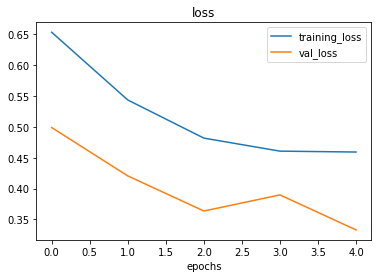

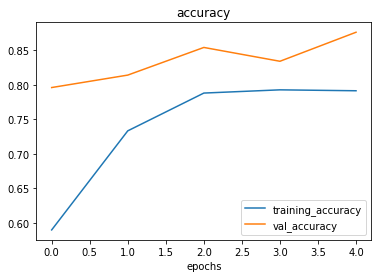

In [52]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leveage what another image model has learned and adjust it for our own use case

**Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [53]:
# Increase number of filter
model_8 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 [==============================] - 28s 539ms/step - loss: 0.6206 - accuracy: 0.6453 - val_loss: 0.4899 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5250 - accuracy: 0.7393 - val_loss: 0.4090 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 26s 548ms/step - loss: 0.4919 - accuracy: 0.7567 - val_loss: 0.3798 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 26s 550ms/step - loss: 0.4764 - accuracy: 0.7907 - val_loss: 0.3288 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4719 - accuracy: 0.7827 - val_loss: 0.3342 - val_accuracy: 0.8740


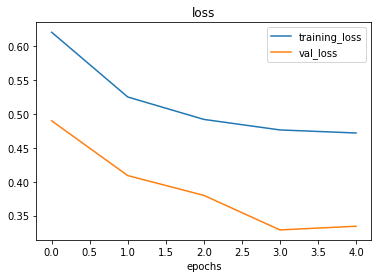

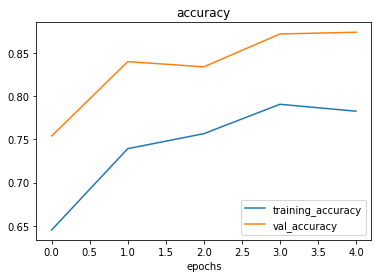

In [54]:
plot_loss_curves(history_8)

## Making a prediction with our trained model on our own custom data

In [55]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-02-22 00:46:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-02-22 00:46:05 (85.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



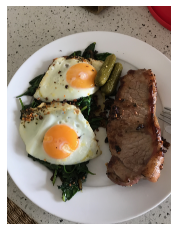

In [56]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [57]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [58]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channel).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  
  # Decode the readfile into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [59]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [60]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 190ms/step


array([[0.8345701]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouln't it be nice if we could visualize the image as well as the model's prediction?

In [61]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [62]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [63]:
def pred_and_plot(model, filename, class_name=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


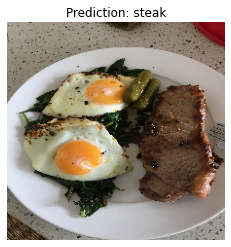

In [64]:
# Test out model on a custom image
pred_and_plot(model_8, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza

In [66]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images
pred_and_plot(model_8, "03-pizza-dad.jpeg")

--2023-02-22 00:46:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-02-22 00:46:11 ERROR 404: Not Found.



NotFoundError: ignored

## Mult-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat basline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [67]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-22 00:46:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 173.194.79.128, 2a00:1450:4013:c14::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  31.8MB/s    in 17s     

2023-02-22 00:46:30 (29.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [68]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 10 directori

In [69]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [70]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2573509.jpg']
Image shape: (512, 512, 3)


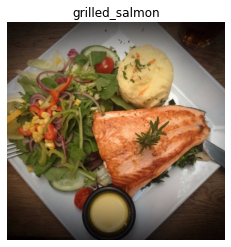

In [71]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [73]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224,),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [74]:
images, labels = train_data.next()
images[:2]

array([[[[0.2784314 , 0.20000002, 0.10588236],
         [0.28627452, 0.20784315, 0.10980393],
         [0.3019608 , 0.21568629, 0.12156864],
         ...,
         [0.63529414, 0.3921569 , 0.19215688],
         [0.63529414, 0.3921569 , 0.19215688],
         [0.6313726 , 0.38823533, 0.18823531]],

        [[0.26666668, 0.19607845, 0.10980393],
         [0.27058825, 0.18823531, 0.10588236],
         [0.28235295, 0.20392159, 0.10980393],
         ...,
         [0.6666667 , 0.38431376, 0.19607845],
         [0.6666667 , 0.37647063, 0.19215688],
         [0.6666667 , 0.37647063, 0.19215688]],

        [[0.25490198, 0.18431373, 0.10588236],
         [0.25490198, 0.18431373, 0.10588236],
         [0.2627451 , 0.18039216, 0.09803922],
         ...,
         [0.6666667 , 0.3254902 , 0.14901961],
         [0.6627451 , 0.3137255 , 0.14117648],
         [0.67058825, 0.30980393, 0.14901961]],

        ...,

        [[0.7725491 , 0.6509804 , 0.47058827],
         [0.76470596, 0.6509804 , 0.4784314 ]

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # Output layer refers to how many classes we are working with
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
235/235 [==============================] - 59s 241ms/step - loss: 2.1222 - accuracy: 0.2296 - val_loss: 1.9801 - val_accuracy: 0.2944
Epoch 2/5
235/235 [==============================] - 59s 253ms/step - loss: 1.8933 - accuracy: 0.3428 - val_loss: 1.8762 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 62s 264ms/step - loss: 1.6145 - accuracy: 0.4525 - val_loss: 1.9453 - val_accuracy: 0.3344
Epoch 4/5
235/235 [==============================] - 52s 224ms/step - loss: 1.0573 - accuracy: 0.6495 - val_loss: 2.2905 - val_accuracy: 0.3008
Epoch 5/5
235/235 [==============================] - 59s 251ms/step - loss: 0.4734 - accuracy: 0.8464 - val_loss: 3.4793 - val_accuracy: 0.2572


### 5. Evaluate the model

In [77]:
# Evaluate on the test data

model_9.evaluate(test_data)

79/79 [==============================] - 14s 180ms/step - loss: 3.4793 - accuracy: 0.2572


[3.479330539703369, 0.2572000026702881]

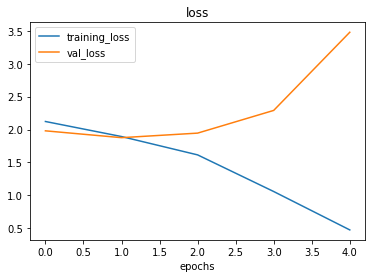

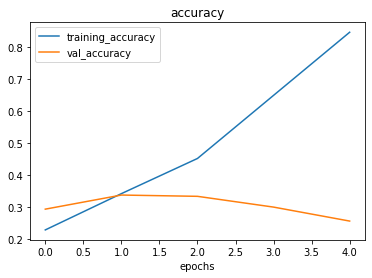

In [79]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_9)

What do these loss curves tell us?

Well... it seems our model is overfitting the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorlt on the test dataset

### 6. Adjust the model hyperparameters (to beat the baselin/reduce overfitting)

Let's try and overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [80]:
# How about we try and simplify the model first?
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [81]:
# Lets try removing 2 convolutional layers
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [82]:
# Fit the model with 2x conv layers removed
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 219ms/step - loss: 2.1597 - accuracy: 0.2340 - val_loss: 1.9366 - val_accuracy: 0.3248
Epoch 2/5
235/235 [==============================] - 50s 214ms/step - loss: 1.7750 - accuracy: 0.4027 - val_loss: 1.9200 - val_accuracy: 0.3304
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.4035 - accuracy: 0.5395 - val_loss: 1.9545 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 59s 252ms/step - loss: 0.9182 - accuracy: 0.7099 - val_loss: 2.2547 - val_accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 61s 261ms/step - loss: 0.4817 - accuracy: 0.8687 - val_loss: 2.7520 - val_accuracy: 0.2928


Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

If you check the summary of both the last two experiments, the number of parameters increased when we decreased the number of convolutional layers.  This is because convolutional layers condenses the down how the model is reading for features.  The more layers, the more the model looks for specific features

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

In [83]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=42,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [84]:
# Let's create another model but this time we'll fit it on the augmented traing data
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using the same setup as previous models)
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [85]:
# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
179/179 [==============================] - 138s 757ms/step - loss: 2.2034 - accuracy: 0.1831 - val_loss: 2.0314 - val_accuracy: 0.2772
Epoch 2/5
179/179 [==============================] - 155s 868ms/step - loss: 2.0280 - accuracy: 0.2799 - val_loss: 1.9332 - val_accuracy: 0.3108
Epoch 3/5
179/179 [==============================] - 140s 782ms/step - loss: 1.9580 - accuracy: 0.3159 - val_loss: 1.8572 - val_accuracy: 0.3612
Epoch 4/5
179/179 [==============================] - 127s 708ms/step - loss: 1.9108 - accuracy: 0.3343 - val_loss: 1.9072 - val_accuracy: 0.3416
Epoch 5/5
179/179 [==============================] - 157s 877ms/step - loss: 1.8976 - accuracy: 0.3425 - val_loss: 1.7190 - val_accuracy: 0.3992


In [86]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 3.4793 - accuracy: 0.2572


[3.4793307781219482, 0.2572000026702881]

In [87]:
model_11.evaluate(test_data)

79/79 [==============================] - 15s 195ms/step - loss: 1.7190 - accuracy: 0.3992


[1.7190388441085815, 0.3991999924182892]

In [88]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_11)

NameError: ignored

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the ght direction (certainly not the wrond direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

## Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [90]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [91]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-02-22 01:57:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-02-22 01:57:34 (102 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-02-22 01:57:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [92]:
# Reconfig pred_plot function to work with multi-class images
def pred_and_plot(model, filename, class_name=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]


  # Get the predicted class

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 251ms/step


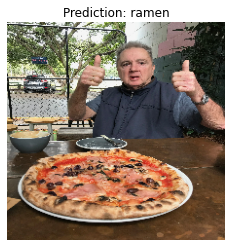

In [94]:
# Make a prediction using model 11
pred_and_plot(model=model_11,
              filename="03-pizza-dad.jpeg",
              class_name=class_names)